In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

import matplotlib.pyplot as plt 
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


/kaggle/input/insurance/insurance.csv


age: age of primary beneficiary

sex: insurance contractor gender, female, male

bmi: Body mass index

children: Number of children covered by health insurance / Number of dependents

smoker: Smoking

region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

charges: Individual medical costs billed by health insurance

In [ ]:
data = pd.read_csv("/kaggle/input/insurance/insurance.csv")
data.head()

In [5]:
data.info() #no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


**EDA/Plotting**

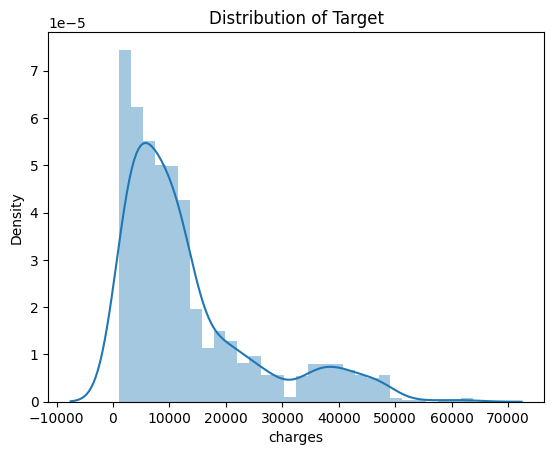

In [9]:
#Distribution of the target

sns.distplot(a=data["charges"])
plt.title("Distribution of Target")
plt.show()

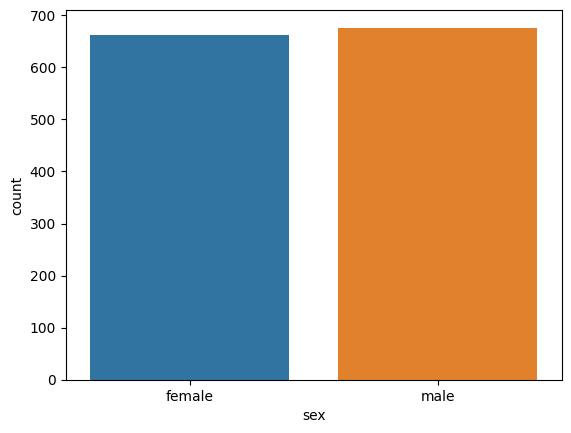

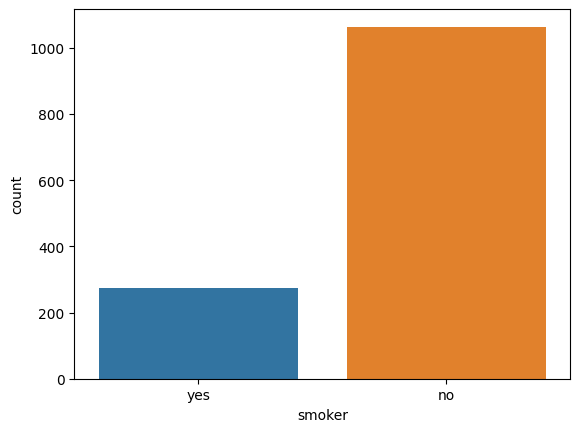

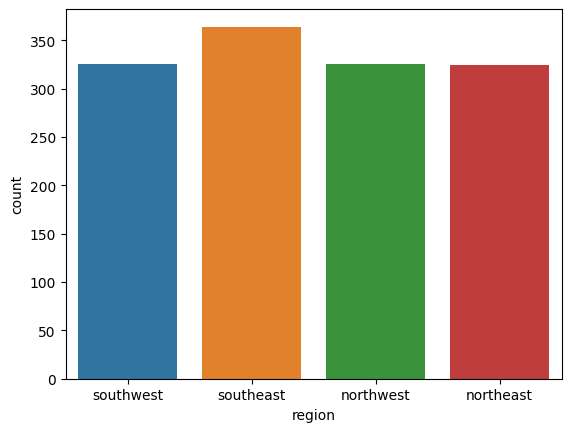

In [12]:
#Distribution of categorical variables
cat_features = data.select_dtypes("object")

for i in cat_features:
    sns.countplot(data=data,x=i)
    plt.show()

#the sex feature & regions features seem balanced, not the case for smoker

In [26]:
cat_list = cat_features.columns.tolist()

<Axes: xlabel='region', ylabel='charges'>

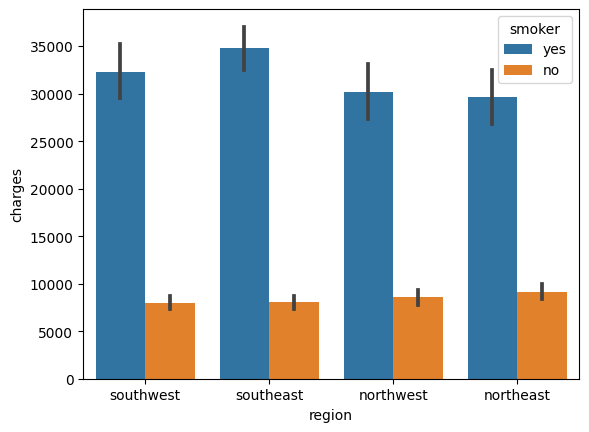

In [28]:
#Explore target vs categorical features
#smokers "use" more charges than non smoker in all regions. Southeast charges seem a bit higher

sns.barplot(data=data,x="region",y="charges",hue="smoker")

<Axes: xlabel='sex', ylabel='charges'>

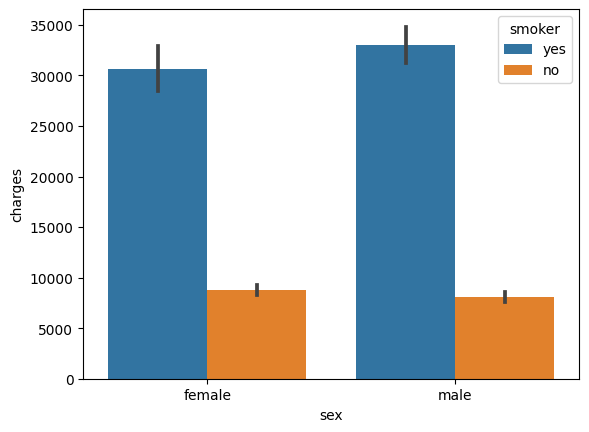

In [29]:
#smokers "use" more charges than non smoker in both sexes
sns.barplot(data=data,x="sex",y="charges",hue="smoker")

<Axes: xlabel='smoker', ylabel='charges'>

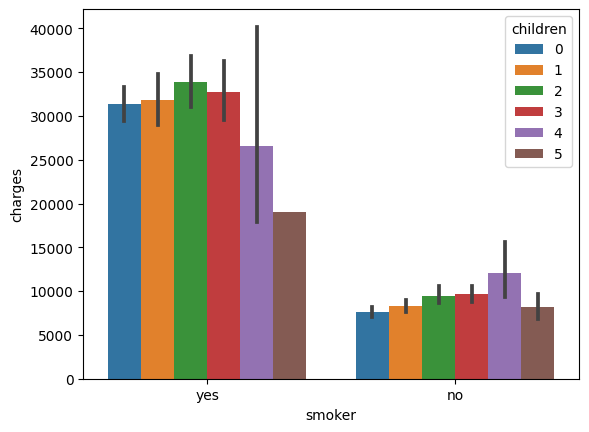

In [35]:
#Explore target vs features
#smokers tend to have less children 

sns.barplot(data=data,x="smoker",y="charges",hue="children")

In [41]:
#Distribution of numerical variables
num_features = data.select_dtypes("number").columns.tolist()
num_features

['age', 'bmi', 'children', 'charges']

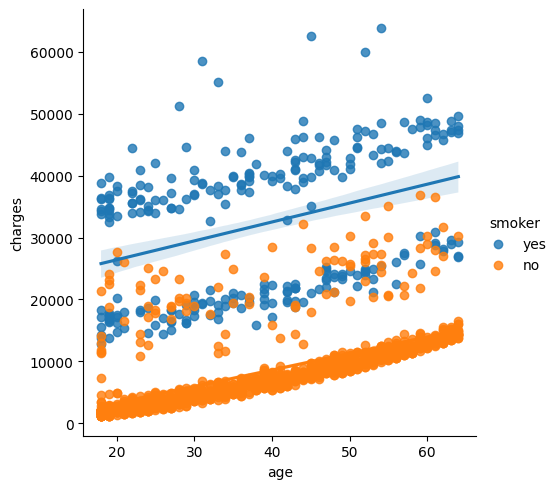

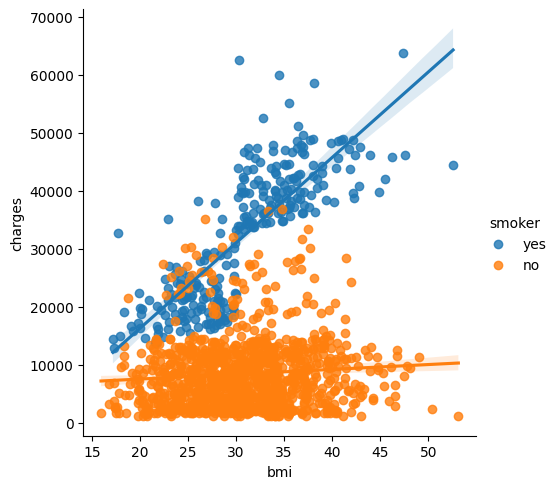

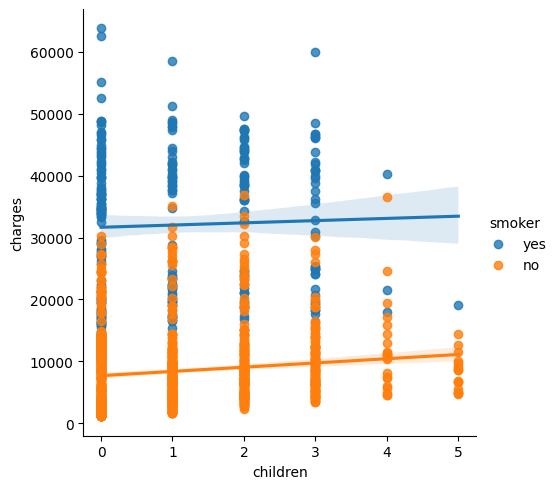

In [47]:
sns.lmplot(data=data,x="age",y="charges",hue="smoker")
#strong linear correlation, higher slope for smokers

sns.lmplot(data=data,x="bmi",y="charges",hue="smoker")
#"good" linear correlation, mucher higher slope for smokers

sns.lmplot(data=data,x="children",y="charges",hue="smoker")
#smokers tend to have less children

In [62]:
#Feature Engineering: Label Encoding
from sklearn.preprocessing import LabelEncoder


columns_to_encode = ["sex","region","smoker"]
encoder = LabelEncoder()

for column in columns_to_encode:
    data[column] = encoder.fit_transform(data[column])

data.head()


,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


<Axes: >

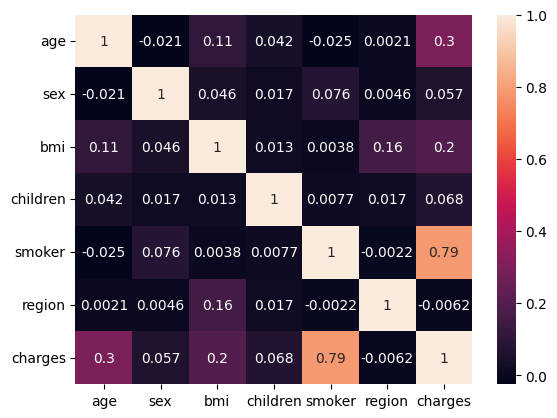

In [67]:
#plotting correlation

corr = data.corr()
sns.heatmap(corr,annot=True)

#small colinearity between bmi & region

<Axes: >

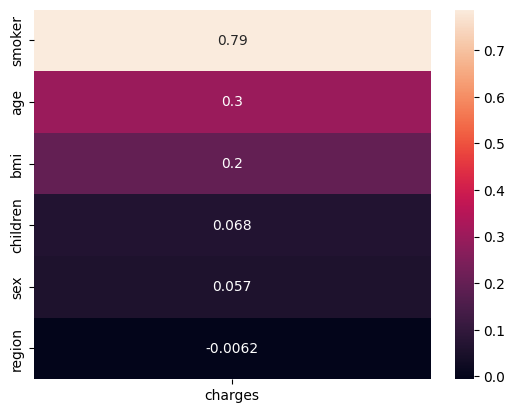

In [71]:
target_corr = data.corr()["charges"].drop("charges").sort_values(ascending=False).to_frame()
sns.heatmap(target_corr,annot=True)

#target mainly explaing by smoking, then age & BMI

In [75]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [112]:
X=data.drop("charges",axis=1)
y=data[["charges"]]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2,random_state=0)

for i in [X_train,X_test,y_train,y_test]:
    print(i.shape)

(1070, 6)
(268, 6)
(1070, 1)
(268, 1)


In [113]:
#Linear Regression
LR = LinearRegression()

LR.fit(X_train,y_train)

check_train_pred = LR.predict(X_train)
train_mse = mean_squared_error(y_train,check_train_pred)
train_score = LR.score(X_train, y_train)


y_pred = LR.predict(X_test)
ols_test_mse = mean_squared_error(y_test,y_pred)
ols_test_score = LR.score(X_test, y_test)

print("train_mse: ", train_mse**.5)
print("train_score: ", train_score)

print("ols_test_mse: ", ols_test_mse**.5)
print("ols_test_score: ", ols_test_score)

train_mse:  6142.440924408569
train_score:  0.7368306228430944
ols_test_mse:  5643.219748880902
ols_test_score:  0.7998747145449959


,age,sex,bmi,children,smoker,region
0,253.991852,-24.324551,328.402617,443.729295,23568.879484,-288.508573


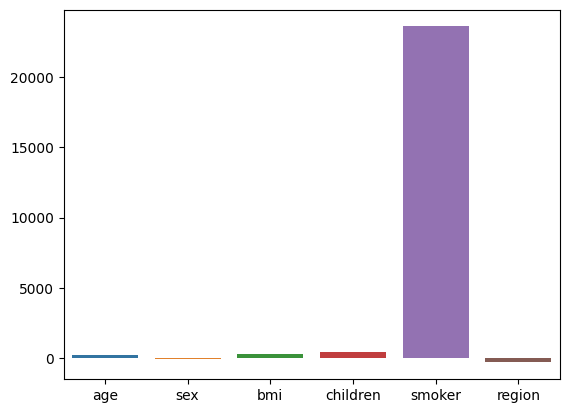

In [120]:
#OLS features importance

ols_coeffs = pd.DataFrame(LR.coef_)

ols_coeffs.columns = X_train.columns.tolist()

sns.barplot(data=ols_coeffs)
ols_coeffs

In [110]:
#Linear Regression, less features (same as Lasso ? will see)
X_n=data.drop(columns = ["charges","region","sex","children","age","bmi"] , axis=1)
y_n=data[["charges"]]

X_train,X_test,y_train,y_test = train_test_split(X_n,y_n,test_size=.2,random_state=0)

X_train

,smoker
621,1
194,0
240,1
1168,0
1192,0
...,...
763,0
835,0
1216,0
559,0


In [114]:
#Linear Regression, less features (same as Lasso ? will see)
LR_s = LinearRegression()

LR_s.fit(X_train,y_train)

check_train_pred = LR_s.predict(X_train)
train_mse = mean_squared_error(y_train,check_train_pred)
train_score = LR_s.score(X_train, y_train)


y_pred = LR_s.predict(X_test)
ols_reduced_test_mse = mean_squared_error(y_test,y_pred)
ols_reduced_test_score = LR_s.score(X_test, y_test)

print("train_rmse: ", train_mse**.5)
print("train_score: ", train_score)

print("ols_reduced_test_rmse: ", ols_reduced_test_mse**.5)
print("ols_reduced_test_score: ", ols_reduced_test_score)

# Higher bias, less explainability. We need a better model, this one is too simple

train_rmse:  6142.440924408569
train_score:  0.7368306228430944
ols_reduced_test_rmse:  5643.219748880902
ols_reduced_test_score:  0.7998747145449959


In [106]:
#Start with Ridge. We've seen above that (drastically) reducing the number of features gives poorer results
from sklearn.linear_model import Ridge

X=data.drop("charges",axis=1)
y=data[["charges"]]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2,random_state=0)

ridge = Ridge()

ridge.fit(X_train,y_train)

check_train_pred = ridge.predict(X_train)
train_mse = mean_squared_error(y_train,check_train_pred)
train_score = ridge.score(X_train, y_train)


y_pred = ridge.predict(X_test)
ridge_test_mse = mean_squared_error(y_test,y_pred)
ridge_test_score = ridge.score(X_test, y_test)

print("ridge_train_rmse: ", train_mse**.5)
print("ridge_train_score: ", train_score)

print("ridge_test_rmse: ", ridge_test_mse**.5)
print("ridge_test_score: ", ridge_test_score)


#Similar rmse to Ols, We need a better model


ridge_train_rmse:  6142.682315722428
ridge_train_score:  0.7368099378903961
ridge_test_rmse:  5648.292031679054
ridge_test_score:  0.7995147965249456


In [139]:
#Ridge coefficients
ridge_coeffs = pd.DataFrame(ridge.coef_)
#ridge_coeffs.columns  = X_train.columns.tolist()
ridge_coeffs

,0,1,2,3,4,5
0,253.796213,-18.724228,328.276862,444.743658,23433.44642,-289.543056


In [146]:
#Let's see if Lasso removes some features and gives better results

from sklearn.linear_model import Lasso

lasso = Lasso()

lasso.fit(X_train,y_train)

check_train_pred = lasso.predict(X_train)
train_mse = mean_squared_error(y_train,check_train_pred)
train_score = lasso.score(X_train, y_train)


y_pred = lasso.predict(X_test)
lasso_test_mse = mean_squared_error(y_test,y_pred)
lasso_test_score = lasso.score(X_test, y_test)

print("lasso_train_rmse: ", train_mse**.5)
print("lasso_train_score: ", train_score)

print("lasso_test_rmse: ", lasso_test_mse**.5)
print("lasso_test_score: ", lasso_test_score)


#Similar results


lasso_train_rmse:  6142.441924189154
lasso_train_score:  0.7368305371730299
lasso_test_rmse:  5643.622024414162
lasso_test_score:  0.7998461817644502


In [149]:
#Lasso coefficients
pd.DataFrame(lasso.coef_).transpose()
#Lasso did not nullify any features coefficients


,0,1,2,3,4,5
0,253.988856,-19.992338,328.337191,443.021793,23562.547417,-287.667929


In [191]:
#RandomForest Regressor 
from sklearn.ensemble import RandomForestRegressor

RFR = RandomForestRegressor(random_state=0)


RFR.fit(X_train,y_train)

check_train_pred = RFR.predict(X_train)
train_mse = mean_squared_error(y_train,check_train_pred)
train_score = RFR.score(X_train, y_train)


y_pred = RFR.predict(X_test)
rfr_test_mse = mean_squared_error(y_test,y_pred)
rfr_test_score = RFR.score(X_test, y_test)

print("rfr_train_rmse: ", train_mse**.5)
print("rfr_train_score: ", train_score)

print("rfr_test_rmse: ", rfr_test_mse**.5)
print("rfr_test_score: ", rfr_test_score)

# smaller "overall error" and higher explainability. But seems to be overfitting as test error is much higher than the test one, let's try to tune the parameters

rfr_train_rmse:  1943.813021169811
rfr_train_score:  0.9736450406852873
rfr_test_rmse:  4534.528439563755
rfr_test_score:  0.870785187973657


In [226]:
#RandomForest Regressor 
from sklearn.ensemble import RandomForestRegressor

RFR = RandomForestRegressor(n_estimators=100,max_depth=5,max_features=.7,min_samples_leaf=1,random_state=0)

#RandomForestRegressor(n_estimators=100, max_depth=None, min_samples_leaf=1, max_features=1.0)

RFR.fit(X_train,y_train)

check_train_pred = RFR.predict(X_train)
train_mse = mean_squared_error(y_train,check_train_pred)
train_score = RFR.score(X_train, y_train)


y_pred = RFR.predict(X_test)
rfr_test_mse = mean_squared_error(y_test,y_pred)
rfr_test_score = RFR.score(X_test, y_test)

print("rfr_train_rmse: ", train_mse**.5)
print("rfr_train_score: ", train_score)

print("rfr_test_rmse: ", rfr_test_mse**.5)
print("rfr_test_score: ", rfr_test_score)

# smaller "overall error" and higher explainability. But seems to be overfitting as test error is much higher than the test one, let's try to tune the parameters

rfr_train_rmse:  4173.974636756376
rfr_train_score:  0.8784785375211
rfr_test_rmse:  3984.4679630077726
rfr_test_score:  0.9002325852619907


In [185]:
# Gradient Boosting
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

gb = GradientBoostingRegressor(max_depth=4, n_estimators=200, random_state=0)


gb.fit(X_train,y_train)

check_train_pred = gb.predict(X_train)
train_mse = mean_squared_error(y_train,check_train_pred)
train_score = gb.score(X_train, y_train)


y_pred = gb.predict(X_test)
gb_test_mse = mean_squared_error(y_test,y_pred)
gb_test_score = gb.score(X_test, y_test)

print("rfr_train_rmse: ", train_mse**.5)
print("rfr_train_score: ", train_score)

print("gb_test_rmse: ", gb_test_mse**.5)
print("gb_test_score: ", gb_test_score)

#overfitting, let's reduce complexity

rfr_train_rmse:  2541.8846954199666
rfr_train_score:  0.9549323338448447
gb_test_rmse:  4456.1599262020645
gb_test_score:  0.8752129328875723


In [229]:
# Gradient Boosting
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

gb = GradientBoostingRegressor(max_depth=2, n_estimators=100, random_state=0)


gb.fit(X_train,y_train)

check_train_pred = gb.predict(X_train)
train_mse = mean_squared_error(y_train,check_train_pred)
train_score = gb.score(X_train, y_train)


y_pred = gb.predict(X_test)
gb_test_mse = mean_squared_error(y_test,y_pred)
gb_test_score = gb.score(X_test, y_test)

print("rfr_train_rmse: ", train_mse**.5)
print("rfr_train_score: ", train_score)

print("gb_test_rmse: ", gb_test_mse**.5)
print("gb_test_score: ", gb_test_score)

#overfitting, let's reduce complexity

rfr_train_rmse:  4282.246723364221
rfr_train_score:  0.8720922829635642
gb_test_rmse:  3973.518451229919
gb_test_score:  0.9007801632586114


In [241]:
import lightgbm
from lightgbm import LGBMRegressor

lgbm_model = LGBMRegressor(num_leaves=31, max_depth=3, learning_rate=0.1, n_estimators=100,random_state=0)

lgbm_model.fit(X_train,y_train)

check_train_pred = lgbm_model.predict(X_train)
train_mse = mean_squared_error(y_train,check_train_pred)
train_score = lgbm_model.score(X_train, y_train)


y_pred = lgbm_model.predict(X_test)
lgbm_model_test_mse = mean_squared_error(y_test,y_pred)
lgbm_model_test_score = lgbm_model.score(X_test, y_test)

print("lgbm_model_train_rmse: ", train_mse**.5)
print("lgbm_model_train_score: ", train_score)

print("lgbm_model_test_rmse: ", lgbm_model_test_mse**.5)
print("lgbm_model_test_score: ", lgbm_model_test_score)

#slightly better

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000301 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 317
[LightGBM] [Info] Number of data points in the train set: 1070, number of used features: 6
[LightGBM] [Info] Start training from score 13201.182046
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain